In [2]:
import sys
import os

# Adicionar o diretório raiz do projeto ao sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Vai um nível acima de "notebooks"
sys.path.append(project_root)

print("Diretório raiz do projeto adicionado ao sys.path:", project_root)


Diretório raiz do projeto adicionado ao sys.path: C:\Users\luisg\Music\ufma\mineracao-de-dados\diabetes-data-mining


In [3]:
# 📦 Imports principais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações para exibição e gráficos
pd.set_option("display.float_format", "{:.2f}".format)
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# 📂 Carregar o dataset limpo
cleaned_path = "../dataset/processed/data_cleaned.csv"
df = pd.read_csv(cleaned_path, parse_dates=["Date"])  # Converter 'Date' para datetime

# Resumo inicial
print("\n✅ Dataset limpo carregado!")
print(df.info())


✅ Dataset limpo carregado!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17211 entries, 0 to 17210
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       17211 non-null  datetime64[ns]
 1   Country    17211 non-null  object        
 2   Status     17211 non-null  object        
 3   AQI Value  17211 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 538.0+ KB
None


In [5]:
# 📊 Cálculo do IQR
Q1 = df["AQI Value"].quantile(0.25)  # Primeiro quartil
Q3 = df["AQI Value"].quantile(0.75)  # Terceiro quartil
IQR = Q3 - Q1  # Intervalo interquartil

In [6]:
# Limites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [7]:
# Criar uma coluna para marcar os outliers
df["Outlier"] = (df["AQI Value"] < lower_limit) | (df["AQI Value"] > upper_limit)

# Exibir quantidade de outliers
num_outliers = df["Outlier"].sum()
print(f"\n🔍 Número de outliers identificados pelo IQR: {num_outliers}")
print(f"📌 Limites: Inferior = {lower_limit:.2f}, Superior = {upper_limit:.2f}")


🔍 Número de outliers identificados pelo IQR: 582
📌 Limites: Inferior = -52.00, Superior = 164.00


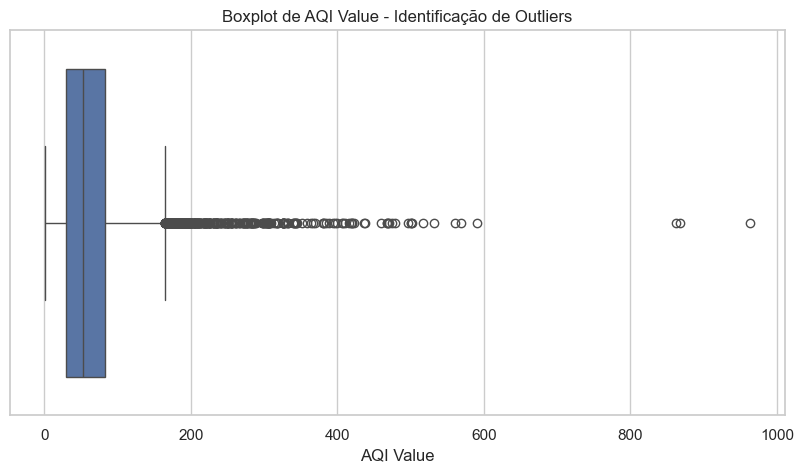

In [8]:
# 📊 Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["AQI Value"])
plt.title("Boxplot de AQI Value - Identificação de Outliers")
plt.show()


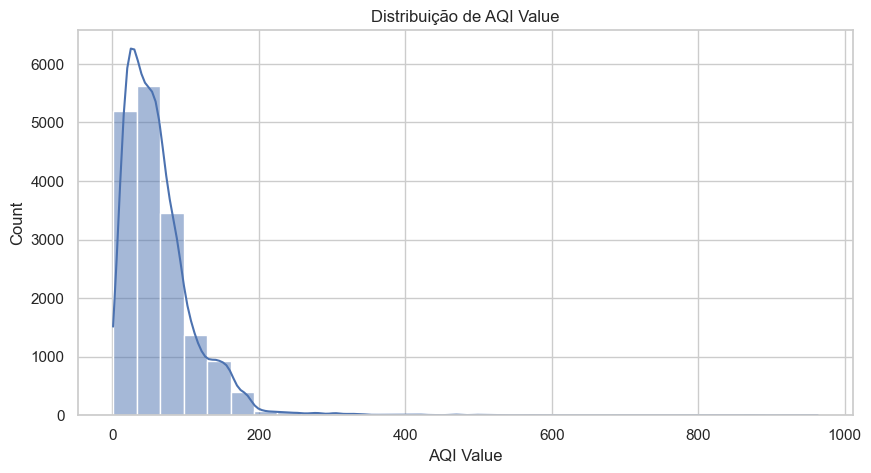

In [9]:
# 📊 Histograma com KDE
plt.figure(figsize=(10, 5))
sns.histplot(df["AQI Value"], kde=True, bins=30)
plt.title("Distribuição de AQI Value")
plt.show()

In [10]:
# Exibir exemplos de outliers
outliers_df = df[df["Outlier"]]
print("\n🔍 Exemplos de outliers identificados:")
print(outliers_df.head(10))



🔍 Exemplos de outliers identificados:
          Date       Country          Status  AQI Value  Outlier
9   2022-07-21       Bahrain       Unhealthy     165.00     True
27  2022-07-21         Chile       Unhealthy     178.00     True
40  2022-07-21      Ethiopia       Unhealthy     165.00     True
61  2022-07-21          Iran  Very Unhealthy     250.00     True
62  2022-07-21          Iraq  Very Unhealthy     234.00     True
107 2022-07-21         Qatar       Unhealthy     183.00     True
112 2022-07-21  Saudi Arabia  Very Unhealthy     272.00     True
132 2022-07-21        Uganda       Unhealthy     198.00     True
165 2022-07-21         Chile  Very Unhealthy     212.00     True
187 2022-07-21          Iran  Very Unhealthy     246.00     True



🔍 Dados do país: Chile
                      Date  AQI Value
count                  128     128.00
mean   2023-05-07 19:52:30     117.00
min    2022-07-21 00:00:00      44.00
25%    2022-08-16 18:00:00      80.00
50%    2022-09-16 12:00:00     112.50
75%    2024-06-21 18:00:00     139.75
max    2025-01-30 00:00:00     332.00
std                    NaN      49.94


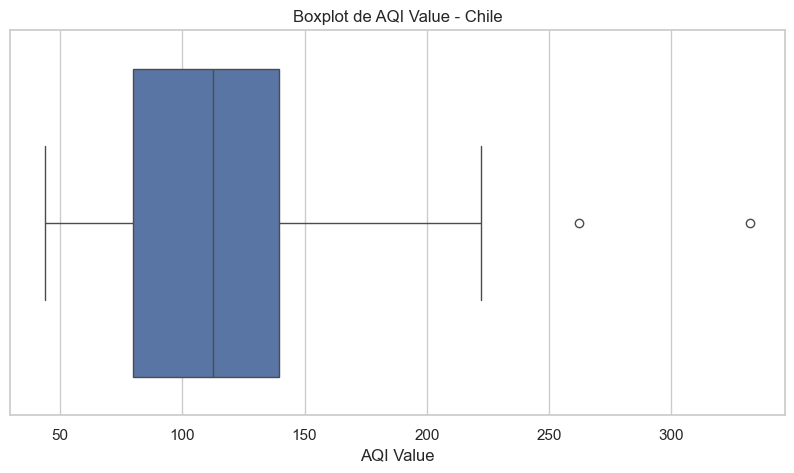

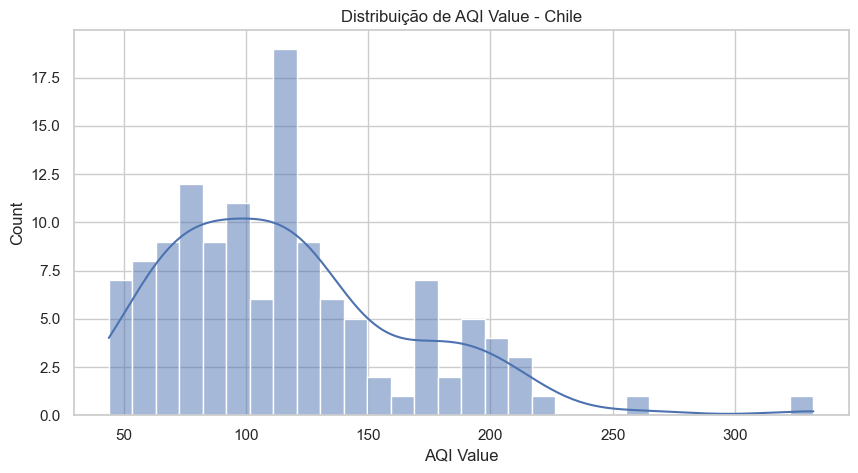

In [11]:
# Filtrar dados do Chile
country = "Chile"
df_country = df[df["Country"] == country]

# Resumo dos dados do Chile
print(f"\n🔍 Dados do país: {country}")
print(df_country.describe())

# Visualizar outliers no Chile
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_country["AQI Value"])
plt.title(f"Boxplot de AQI Value - {country}")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_country["AQI Value"], kde=True, bins=30)
plt.title(f"Distribuição de AQI Value - {country}")
plt.show()


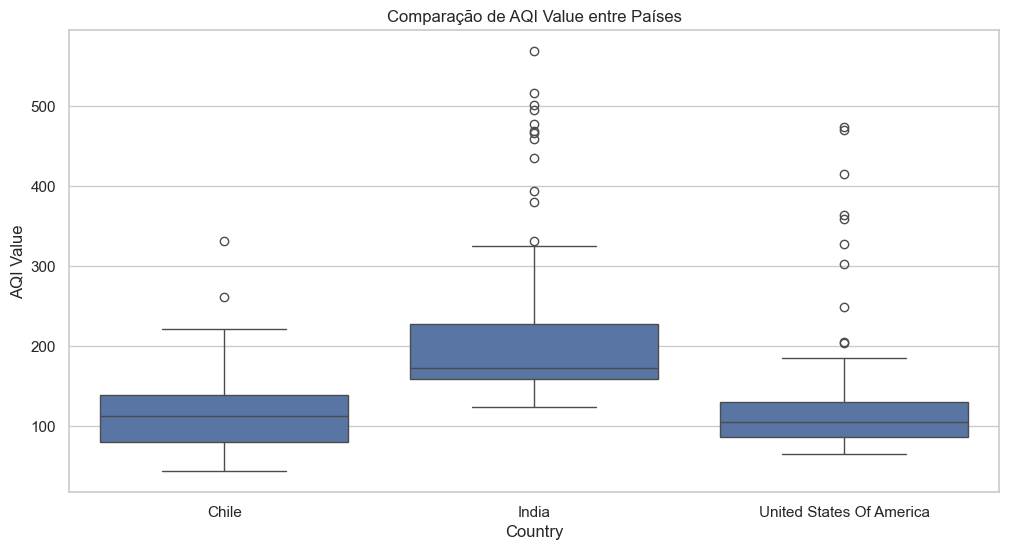

In [12]:
# Selecionar países para comparação
countries = ["Chile", "India", "United States Of America"]
df_comparison = df[df["Country"].isin(countries)]

# Gráfico de boxplot comparativo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_comparison, x="Country", y="AQI Value")
plt.title("Comparação de AQI Value entre Países")
plt.show()



📊 Distribuição dos status no Chile:
Status
Moderate                          53
Unhealthy For Sensitive Groups    45
Unhealthy                         20
Very Unhealthy                     6
Good                               3
Hazardous                          1
Name: count, dtype: int64


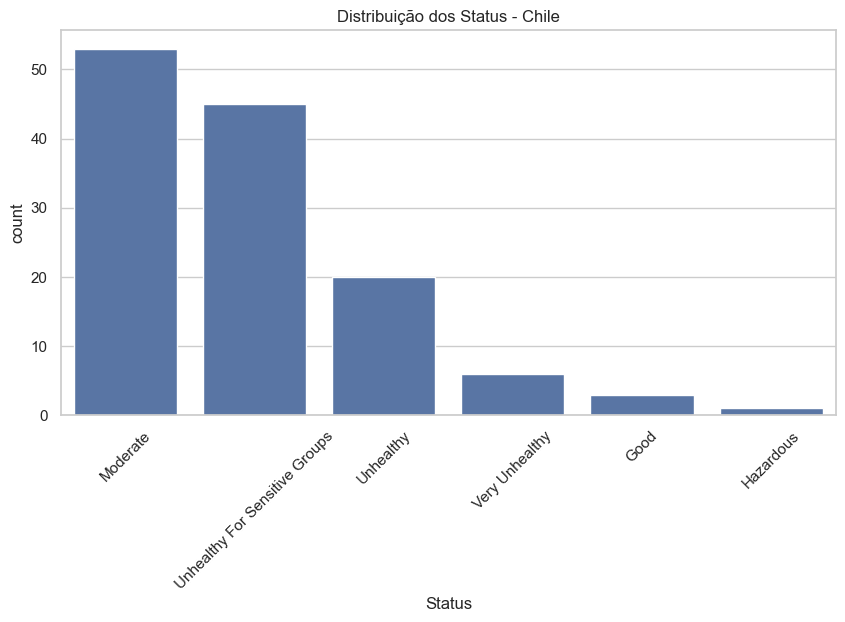

In [13]:
# Frequência dos status no Chile
status_counts = df_country["Status"].value_counts()
print(f"\n📊 Distribuição dos status no Chile:")
print(status_counts)

# Gráfico de barras para status no Chile
plt.figure(figsize=(10, 5))
sns.countplot(data=df_country, x="Status", order=status_counts.index)
plt.title(f"Distribuição dos Status - {country}")
plt.xticks(rotation=45)
plt.show()


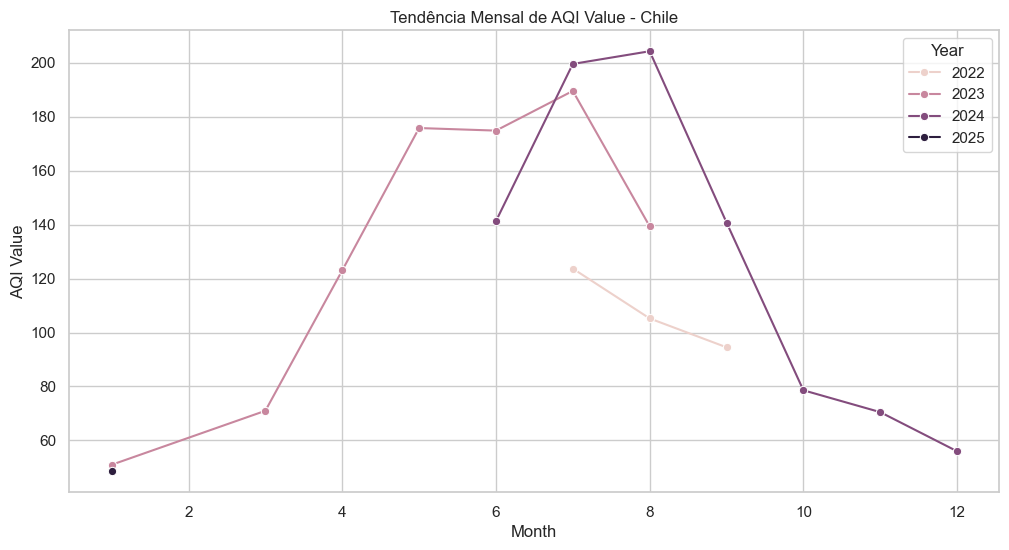

In [15]:
# Adicionar colunas de mês e ano de forma segura
df_country = df_country.copy()  # Evita o warning modificando uma cópia explícita
df_country["Month"] = df_country["Date"].dt.month
df_country["Year"] = df_country["Date"].dt.year

# Gráfico de linha temporal (média mensal de AQI Value)
df_monthly = df_country.groupby(["Year", "Month"])["AQI Value"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x="Month", y="AQI Value", hue="Year", marker="o")
plt.title(f"Tendência Mensal de AQI Value - {country}")
plt.show()


In [16]:
# Salvar o dataset com os outliers marcados
processed_path = "../dataset/processed/data_with_outliers.csv"
df.to_csv(processed_path, index=False, encoding="utf-8")
print(f"✅ Dataset com outliers marcados salvo em: {processed_path}")


✅ Dataset com outliers marcados salvo em: ../dataset/processed/data_with_outliers.csv
